<a href="https://colab.research.google.com/github/arirahman236/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# No 1
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# No 2
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

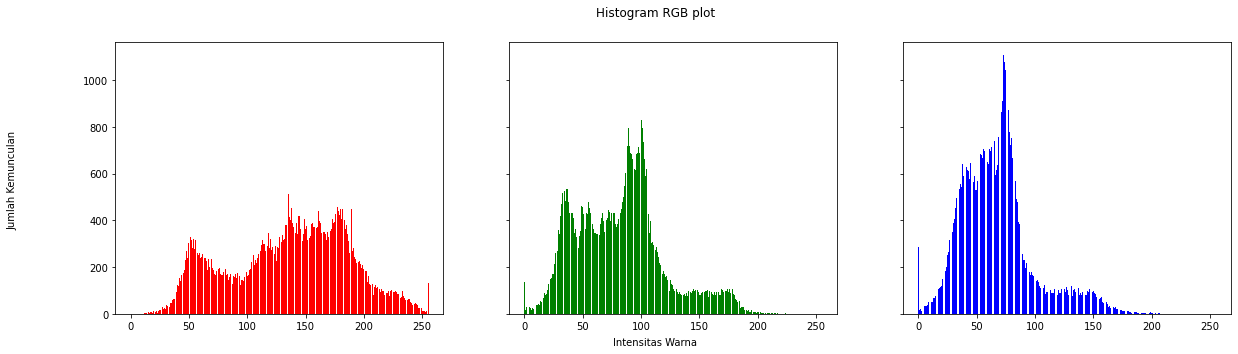

In [6]:
# No 3
img = cv.imread('/content/drive/MyDrive/gambar/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

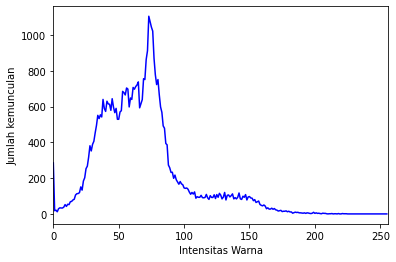

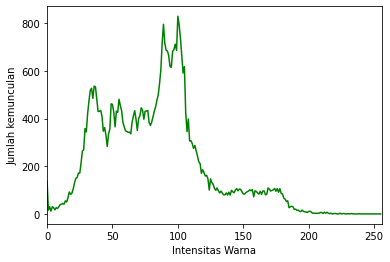

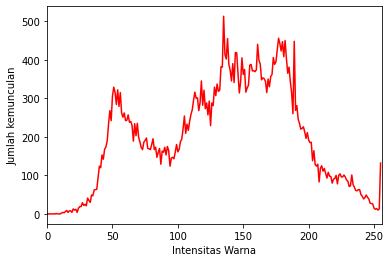

In [7]:
#No 4
img = cv.imread('/content/drive/MyDrive/gambar/lena.jpg')

colors = ('b','g','r')
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.xlim([0,256])
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")
  
  plt.show()

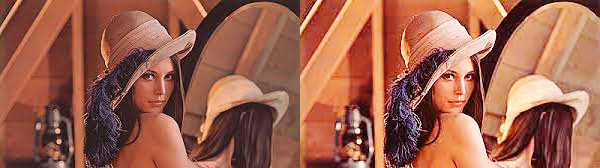

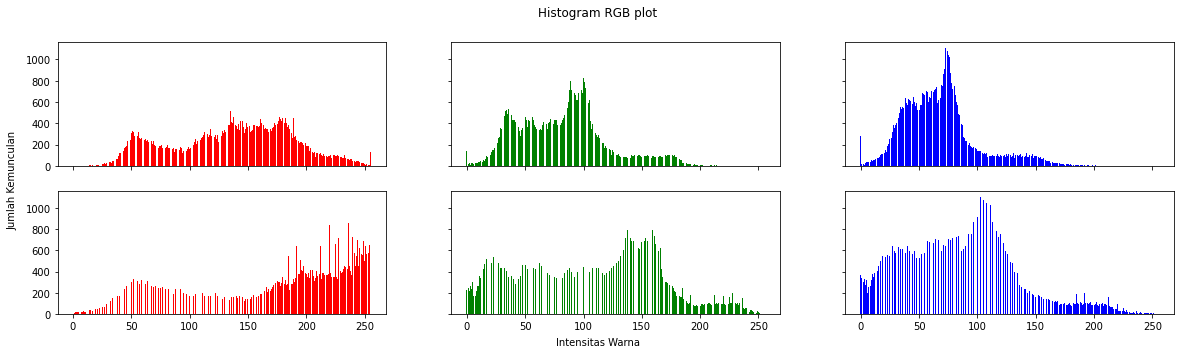

In [8]:
#No 5
img = cv.imread('/content/drive/MyDrive/gambar/lena.jpg')
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_asli = histog(img)

#convert to Numpy array 
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

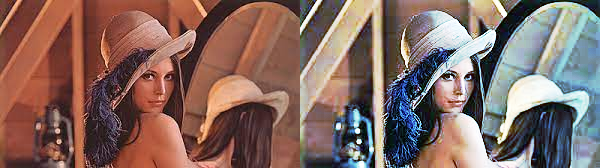

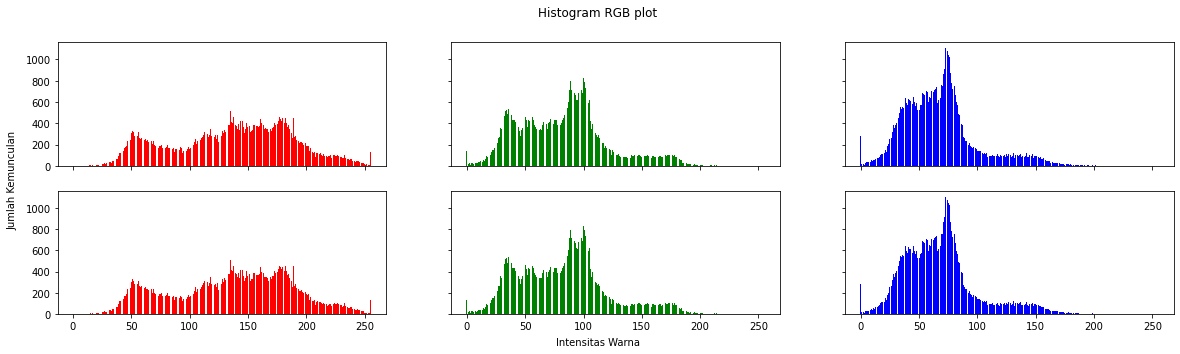

In [11]:
# No 6
img = cv.imread('/content/drive/MyDrive/gambar/lena.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

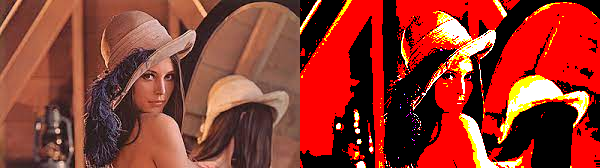

True

In [12]:
# No 7
img_1 = cv.imread('/content/drive/MyDrive/gambar/lena.jpg')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/gambar/rii.jpeg', img_8)

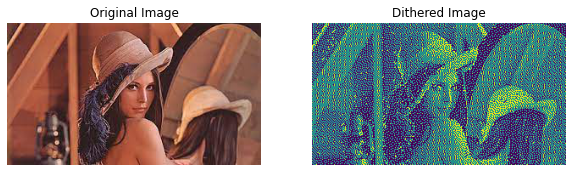

In [30]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/gambar/lena.jpg'
img = Image.open(img_path)

# Convert the image to grayscale
gray_img = img.convert('L')

# Convert the grayscale image to a numpy array
gray_arr = np.array(gray_img)

# Apply dithering using Floyd and Steinberg algorithm
height, width = gray_arr.shape
for y in range(height):
    for x in range(width):
        old_value = gray_arr[y, x]
        new_value = 0 if old_value < 128 else 255
        gray_arr[y, x] = new_value
        error = old_value - new_value

        if x < width - 1:
            gray_arr[y, x + 1] += error * 7 / 16

        if x > 0 and y < height - 1:
            gray_arr[y + 1, x - 1] += error * 3 / 16

        if y < height - 1:
            gray_arr[y + 1, x] += error * 5 / 16

        if x < width - 1 and y < height - 1:
            gray_arr[y + 1, x + 1] += error * 1 / 16

# Convert the numpy array back to an image
dithered_img = Image.fromarray(gray_arr)

# Display the original and dithered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[1].imshow(dithered_img)
axs[1].set_title('Dithered Image')
for ax in axs:
    ax.axis('off')
plt.show()

# Save the dithered image
dithered_img.save('/content/drive/MyDrive/gambar/lena_dithered.jpg')
